In [1]:
# Setup and Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
# Grabs User Login for Postgres

from postgreskeys import postgresurl

In [3]:
# Imports EmployeeSQL database into pandas

engine = create_engine(postgresurl)
connection = engine.connect()

In [4]:
# Uses the Inspector to explore the database and print the table names

inspector = inspect(engine)
inspector.get_table_names()

['Salaries', 'Titles', 'Employees', 'Dept_Emp', 'Departments', 'Dept_Manager']

In [5]:
# Use Inspector to print the column names and types from the Salaries table

columns = inspector.get_columns('Salaries')
for c in columns:
    print(c['name'], c["type"])

emp_no INTEGER
salary INTEGER


In [6]:
# Convert SQL data to Pandas Dataframe
salary_df = pd.read_sql('SELECT salary FROM public."Salaries"', connection)

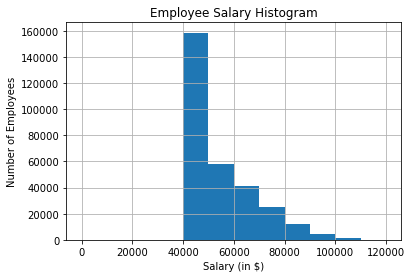

In [7]:
salary_df.hist(column='salary', bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000])
plt.title("Employee Salary Histogram")
plt.xlabel("Salary (in $)")
plt.ylabel("Number of Employees")
plt.show()